In [1]:
import numpy as np

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1) 
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1 
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2 
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise 
    return series[..., np.newaxis].astype(np.float32)


In [3]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [6]:
X_train.shape

(7000, 50, 1)

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
model = keras.models.Sequential([keras.layers.SimpleRNN(1, input_shape=[None, 1])])

In [15]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.mean_squared_error,metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
 992/7000 [===>..........................] - ETA: 1s - loss: 0.0113 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [19]:
# Deep RNN , More neurons per layer and more RNN layers. just stack recurrent layers. 

model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.SimpleRNN(1)
])


In [20]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.mean_squared_error,metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/5
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0614 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 2/5
7000/7000 [==============================] - 6s 797us/sample - loss: 0.0072 - accuracy: 0.0000e+00 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 3/5
7000/7000 [==============================] - 6s 806us/sample - loss: 0.0064 - accuracy: 0.0000e+00 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 4/5
7000/7000 [==============================] - 6s 807us/sample - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 5/5
7000/7000 [==============================] - 6s 821us/sample - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00


In [21]:
# Faster to use a dense layer at the end, also gives the capability to us any activation function.
model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20),
        keras.layers.Dense(1)
]) 

model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.mean_squared_error,metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/5
7000/7000 [==============================] - 5s 748us/sample - loss: 0.0145 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 2/5
7000/7000 [==============================] - 4s 596us/sample - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 3/5
7000/7000 [==============================] - 4s 598us/sample - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 4/5
7000/7000 [==============================] - 4s 594us/sample - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 5/5
7000/7000 [==============================] - 4s 594us/sample - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00


In [25]:
# The previous model can be used to predict any number of future value, the appraoch below is basically making one
# prediction at each step using that to predict the next. - Errors will accumulate.

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:] 
X = X_new
for step_ahead in range(10):
        y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
        X = np.concatenate([X, y_pred_one], axis=1)
Y_pred = X[:, n_steps:]

In [34]:
# Training a RNN to predict all the 10 values.

series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]


In [35]:
model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20),
        keras.layers.Dense(10) # Changed to 10 
])

model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.mean_squared_error,metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/5
7000/7000 [==============================] - 5s 745us/sample - loss: 0.0840 - accuracy: 0.3400 - val_loss: 0.0430 - val_accuracy: 0.4520
Epoch 2/5
7000/7000 [==============================] - 4s 606us/sample - loss: 0.0386 - accuracy: 0.4799 - val_loss: 0.0304 - val_accuracy: 0.4735
Epoch 3/5
7000/7000 [==============================] - 4s 611us/sample - loss: 0.0237 - accuracy: 0.5164 - val_loss: 0.0193 - val_accuracy: 0.5460
Epoch 4/5
7000/7000 [==============================] - 4s 571us/sample - loss: 0.0181 - accuracy: 0.5577 - val_loss: 0.0152 - val_accuracy: 0.5860
Epoch 5/5
7000/7000 [==============================] - 4s 560us/sample - loss: 0.0155 - accuracy: 0.5841 - val_loss: 0.0150 - val_accuracy: 0.6115


In [36]:
Y_pred = model.predict(X_new)

In [37]:
keras.metrics.mean_squared_error(Y_new,Y_pred)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.05967198, 0.02268558, 0.02912185, 0.02440915, 0.01991866,
        0.02172851, 0.02132195, 0.01787519, 0.02338501, 0.07610931]],
      dtype=float32)>

In [40]:
# Generating sequence to sequence models 
# Because we will have more gradients to play with.

Y = np.empty((10000, n_steps, 10)) # each target is a sequence of 10D vectors for step_ahead in range(1, 10 + 1):
Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [42]:
# TimeDistributed layer is used to wrap dense layer to generate a sequence to sequence output.

model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.mean_squared_error,metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid,Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/5
7000/7000 [==============================] - 5s 774us/sample - loss: 0.0262 - accuracy: 0.3147 - val_loss: 0.0076 - val_accuracy: 0.4308
Epoch 2/5
7000/7000 [==============================] - 4s 630us/sample - loss: 0.0070 - accuracy: 0.4435 - val_loss: 0.0065 - val_accuracy: 0.4446
Epoch 3/5
7000/7000 [==============================] - 4s 623us/sample - loss: 0.0064 - accuracy: 0.4606 - val_loss: 0.0061 - val_accuracy: 0.4612
Epoch 4/5
7000/7000 [==============================] - 4s 610us/sample - loss: 0.0061 - accuracy: 0.4544 - val_loss: 0.0057 - val_accuracy: 0.4422
Epoch 5/5
7000/7000 [==============================] - 4s 608us/sample - loss: 0.0056 - accuracy: 0.4702 - val_loss: 0.0056 - val_accuracy: 0.4360


In [43]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)

model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid,Y_valid))


Train on 7000 samples, validate on 2000 samples
Epoch 1/5
7000/7000 [==============================] - 5s 761us/sample - loss: 0.0070 - last_time_step_mse: 0.0059 - val_loss: 0.0051 - val_last_time_step_mse: 0.0035
Epoch 2/5
7000/7000 [==============================] - 4s 610us/sample - loss: 0.0051 - last_time_step_mse: 0.0036 - val_loss: 0.0049 - val_last_time_step_mse: 0.0036
Epoch 3/5
7000/7000 [==============================] - 4s 607us/sample - loss: 0.0049 - last_time_step_mse: 0.0033 - val_loss: 0.0049 - val_last_time_step_mse: 0.0028
Epoch 4/5
7000/7000 [==============================] - 4s 614us/sample - loss: 0.0048 - last_time_step_mse: 0.0032 - val_loss: 0.0046 - val_last_time_step_mse: 0.0027
Epoch 5/5
7000/7000 [==============================] - 4s 620us/sample - loss: 0.0048 - last_time_step_mse: 0.0031 - val_loss: 0.0047 - val_last_time_step_mse: 0.0029


Handling the unstable gradient problem for long sequences:  <b>With Layer Normalization</b>

dropout can be applied by setting the parameter in the model.

In [44]:
class LNSimpleRNNCell(keras.layers.Layer):
    
    def __init__(self, units, activation="tanh", **kwargs):
        
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,activation=None) # activation after normalization.
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation) 
        
    def call(self, inputs, states):
        
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs)) 
        return norm_outputs, [norm_outputs]

In [45]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [46]:
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid,Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/5
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0157 - last_time_step_mse: 0.0148 - val_loss: 0.0074 - val_last_time_step_mse: 0.0071
Epoch 2/5
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0072 - last_time_step_mse: 0.0066 - val_loss: 0.0066 - val_last_time_step_mse: 0.0057
Epoch 3/5
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0068 - last_time_step_mse: 0.0062 - val_loss: 0.0066 - val_last_time_step_mse: 0.0057
Epoch 4/5
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0065 - last_time_step_mse: 0.0058 - val_loss: 0.0062 - val_last_time_step_mse: 0.0057
Epoch 5/5
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0062 - last_time_step_mse: 0.0054 - val_loss: 0.0058 - val_last_time_step_mse: 0.0053


<b>Tackle Short-term memory loss</b>: LSTM Cell

In [47]:
 model = keras.models.Sequential([
        keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))
])

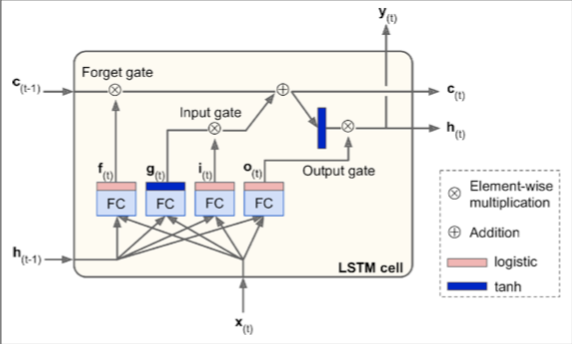

In [48]:
# As you have observed only the x and h(t-1) are inputs to the gates. 
# Using the long-term memory to decide what to do will help

# Peephole connections

model = keras.models.Sequential([
        keras.layers.RNN(keras.experimental.PeepholeLSTMCell(20), return_sequences=True,
                         input_shape=[None, 1]),
        keras.layers.RNN(keras.experimental.PeepholeLSTMCell(20), return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))
    ])


GRU Cell : Simplified LSTM.

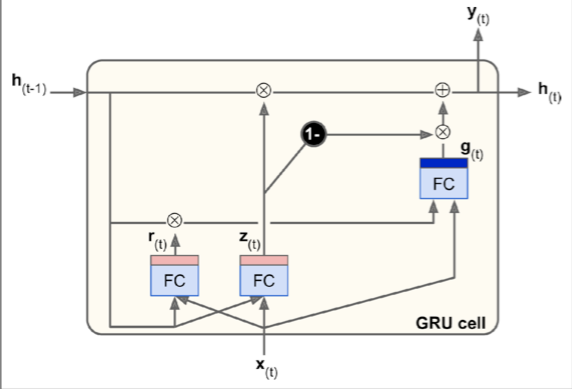

In [50]:
# Combine the states Long and short. Reduce the gates. 

# z : Do I forget or input new information to the states?
# r : Do I need to provide any state information to make current cell Output?
# g : Output added to the previous state. 

In [ ]:
# Problem with these sequence models is that for long sequences they will forget more of the longest held information.
# We can use a 1D convolution layer - with differnt filters to extract the essential information from the layer.
# This will help the sequence models to perform the best.

In [49]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20,
                    validation_data=(X_valid, Y_valid[:, 3::2]))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 7s 980us/sample - loss: 0.0080 - last_time_step_mse: 0.0076 - val_loss: 0.0063 - val_last_time_step_mse: 0.0055
Epoch 2/20
7000/7000 [==============================] - 4s 625us/sample - loss: 0.0060 - last_time_step_mse: 0.0051 - val_loss: 0.0053 - val_last_time_step_mse: 0.0044
Epoch 3/20
7000/7000 [==============================] - 4s 633us/sample - loss: 0.0049 - last_time_step_mse: 0.0039 - val_loss: 0.0044 - val_last_time_step_mse: 0.0033
Epoch 4/20
7000/7000 [==============================] - 4s 634us/sample - loss: 0.0042 - last_time_step_mse: 0.0031 - val_loss: 0.0039 - val_last_time_step_mse: 0.0028
Epoch 5/20
7000/7000 [==============================] - 4s 637us/sample - loss: 0.0039 - last_time_step_mse: 0.0027 - val_loss: 0.0036 - val_last_time_step_mse: 0.0024
Epoch 6/20
7000/7000 [==============================] - 4s 591us/sample - loss: 0.0036 - last_time_step_mse: 0.0

# Wave Net

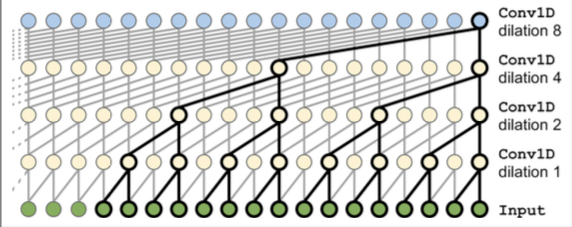

In [51]:
model = keras.models.Sequential() 
model.add(keras.layers.InputLayer(input_shape=[None, 1])) 
for rate in (1,2,4,8)*2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal",activation="relu", dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 3s 390us/sample - loss: 0.0064 - last_time_step_mse: 0.0051 - val_loss: 0.0042 - val_last_time_step_mse: 0.0025
Epoch 2/20
7000/7000 [==============================] - 2s 237us/sample - loss: 0.0039 - last_time_step_mse: 0.0022 - val_loss: 0.0036 - val_last_time_step_mse: 0.0020
Epoch 3/20
7000/7000 [==============================] - 2s 237us/sample - loss: 0.0035 - last_time_step_mse: 0.0019 - val_loss: 0.0034 - val_last_time_step_mse: 0.0018
Epoch 4/20
7000/7000 [==============================] - 2s 234us/sample - loss: 0.0033 - last_time_step_mse: 0.0016 - val_loss: 0.0031 - val_last_time_step_mse: 0.0015
Epoch 5/20
7000/7000 [==============================] - 2s 227us/sample - loss: 0.0032 - last_time_step_mse: 0.0015 - val_loss: 0.0031 - val_last_time_step_mse: 0.0014
Epoch 6/20
7000/7000 [==============================] - 2s 229us/sample - loss: 0.0030 - last_time_step_mse: 0.0